# 과제 1
* 운용회사 컬럼에서 아래 요구사항대로 변경해주세요 
    * 미래에셋자산운용 -> 미래에셋 
    * 삼성자산운용, 삼성액티브자산운용 -> 삼성 
    * 케이비자산운용 -> KB
    * 한국투자신탁운용 -> 한투 
    * 엔에이치아문디자산운용 -> NH
    * 신영자산운용 -> 신영 
    * 나머지 운용사는 -> 기타 

In [1]:
import pandas as pd

fund_1 = pd.read_excel('./data/18년 6월말 기준 운용사 펀드 판매 현황.xls', header=1)

In [2]:
fund_1.head(3)

,운용회사,펀드명,설정일,펀드유형,설정원본,NAV
0,골든브릿지자산운용,골든브릿지고배당목표전환형증권투자신탁S-3[주식혼합]종류Ae,20180305,혼합주식형,60,58
1,골든브릿지자산운용,골든브릿지고배당목표전환형증권투자신탁S-3[주식혼합]종류Ce,20180305,혼합주식형,11,11
2,골든브릿지자산운용,골든브릿지고배당증권투자신탁[주식혼합]종류Ae,20180122,혼합주식형,138,128


In [3]:
fund_1.loc[fund_1['운용회사'] == '미래에셋자산운용', '운용회사'] = '미래에셋'
fund_1.loc[fund_1['운용회사'].isin(['삼성자산운용','삼성액티브자산운용']), '운용회사'] = '삼성'
fund_1.loc[fund_1['운용회사'] == '케이비자산운용', '운용회사']  = 'KB'
fund_1.loc[fund_1['운용회사'] == '한국투자신탁운용', '운용회사']  = '한투'
fund_1.loc[fund_1['운용회사'] == '엔에이치아문디자산운용', '운용회사']  = 'NH'
fund_1.loc[fund_1['운용회사'] == '신영자산운용', '운용회사']  = '신영'
fund_1.loc[~fund_1['운용회사'].isin(['삼성', '한투','미래에셋', 'KB', 'NH', '신영']), '운용회사'] = '기타' # ~ : 반전

In [4]:
fund_1['운용회사'].unique()

array(['기타', '미래에셋', '삼성', '신영', 'NH', 'KB', '한투'], dtype=object)

### 1.2 NAV가 백만원 단위에서 억 단위로 될수 있게 변경해주세요 

In [5]:
fund_1['NAV'] = fund_1['NAV'].apply(lambda x : x / 100)

In [6]:
fund_result = fund_1.groupby(['운용회사'], as_index = False)['NAV'].sum() 

### 1.3 아래처럼 데이터프레임을 만들어주세요

In [7]:
fund_result.set_index("운용회사", inplace = True)

In [9]:
fund_result

,NAV
운용회사,
KB,9029.11
NH,7047.08
기타,37633.93
미래에셋,12062.57
삼성,9688.68
신영,4337.29
한투,7021.68


### 1.4 아래 그림처럼 시각화를 완성해주세요 

In [ ]:
# matplotlib 한글 폰트 오류 문제 해결
import matplotlib.pyplot as plt
import matplotlib as mpl

In [17]:
fund_result.drop(['기타'], inplace = True)

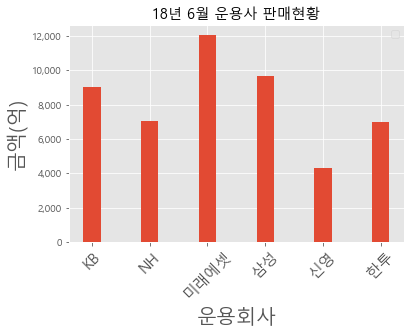

In [18]:
from matplotlib import font_manager, rc
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

with plt.style.context('ggplot'):
    ax = fund_result.plot(kind='bar', title="18년 6월 운용사 판매현황", width=0.3)
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    plt.xticks(rotation=45, fontsize=15)
    plt.xlabel('운용회사', fontsize=20)
    plt.ylabel('금액(억)', fontsize=20)
    plt.legend('')

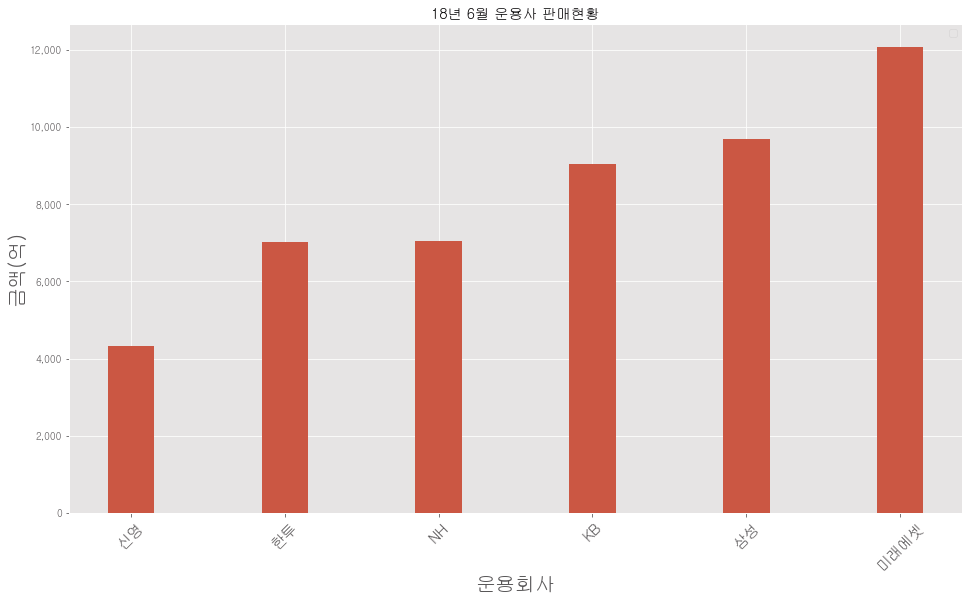

# 2번째 미션

In [37]:
fund_2 = pd.read_excel('./data/1-2 분기별 현황.xlsx')

In [43]:
fund_result = fund_1.groupby(['운용회사'], as_index = False)['NAV'].sum() 

In [44]:
fund_result

,운용회사,NAV
0,KB,9029.11
1,NH,7047.08
2,기타,37633.93
3,미래에셋,12062.57
4,삼성,9688.68
5,신영,4337.29
6,한투,7021.68


In [46]:
fund_result.loc[7, '운용회사'] = '전체'
fund_result.loc[7, 'NAV']= fund_result['NAV'].sum()

In [47]:
fund_result

,운용회사,NAV
0,KB,9029.11
1,NH,7047.08
2,기타,37633.93
3,미래에셋,12062.57
4,삼성,9688.68
5,신영,4337.29
6,한투,7021.68
7,전체,86820.34


* DataFrame을 만들어주세요 

In [48]:
fund_2

,구분,2017 1Q,2017 2Q,2017 3Q,2017 4Q,2018 1Q,2018 6월
0,미래에셋,4749,5712,7466,9463,12096,NaN
1,KB,5140,5272,5826,7030,8597,NaN
2,삼성,3553,4377,5316,6842,10476,NaN
3,신영,2459,3060,3549,4094,4328,NaN
4,NH,3195,3113,5319,6366,7015,NaN
5,한투,1794,2063,2262,4053,7323,NaN
6,기타,16244,19268,23137,28381,34261,NaN
7,전체,37133,42864,52878,66975,84096,NaN


In [49]:
set(fund_result['운용회사']) - set(fund_2.구분.unique())

set()

In [53]:
# 깔끔하게 정리
fund_2.drop(['2018 6월'], axis = 1, inplace = True)
fund_2

,구분,2017 1Q,2017 2Q,2017 3Q,2017 4Q,2018 1Q
0,미래에셋,4749,5712,7466,9463,12096
1,KB,5140,5272,5826,7030,8597
2,삼성,3553,4377,5316,6842,10476
3,신영,2459,3060,3549,4094,4328
4,NH,3195,3113,5319,6366,7015
5,한투,1794,2063,2262,4053,7323
6,기타,16244,19268,23137,28381,34261
7,전체,37133,42864,52878,66975,84096


In [54]:
fund_2.set_index('구분', inplace = True)
fund_2

,2017 1Q,2017 2Q,2017 3Q,2017 4Q,2018 1Q
구분,,,,,
미래에셋,4749,5712,7466,9463,12096
KB,5140,5272,5826,7030,8597
삼성,3553,4377,5316,6842,10476
신영,2459,3060,3549,4094,4328
NH,3195,3113,5319,6366,7015
한투,1794,2063,2262,4053,7323
기타,16244,19268,23137,28381,34261
전체,37133,42864,52878,66975,84096


In [56]:
fund_result.columns = ['구분', '2018 6월']
fund_result.set_index('구분', inplace = True)
fund_result

,2018 6월
구분,
KB,9029.11
NH,7047.08
기타,37633.93
미래에셋,12062.57
삼성,9688.68
신영,4337.29
한투,7021.68
전체,86820.34


In [59]:
fund_2.join(fund_result, how = 'inner')

,2017 1Q,2017 2Q,2017 3Q,2017 4Q,2018 1Q,2018 6월
구분,,,,,,
미래에셋,4749,5712,7466,9463,12096,12062.57
KB,5140,5272,5826,7030,8597,9029.11
삼성,3553,4377,5316,6842,10476,9688.68
신영,2459,3060,3549,4094,4328,4337.29
NH,3195,3113,5319,6366,7015,7047.08
한투,1794,2063,2262,4053,7323,7021.68
기타,16244,19268,23137,28381,34261,37633.93
전체,37133,42864,52878,66975,84096,86820.34


* 운용회사 그래프 그리기

<AxesSubplot:>

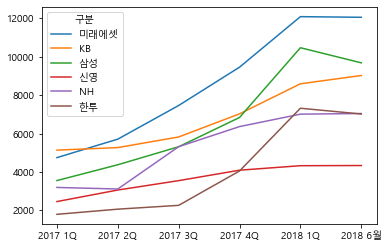

In [63]:
#방법1
mission2 = fund_2.join(fund_result, how = 'inner')
mission21 = mission2.drop(['전체', '기타'])
mission21.T.plot()

In [ ]:
#방법2
